In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/Shareddrives/Machine Learning - Transformers"

/content/drive/Shareddrives/Machine Learning - Transformers


In [ ]:
!pwd

/content/drive/Shareddrives/Machine Learning - Transformers


# Creating Data

In [ ]:
# storing csvs in pandas dataframe

airquality = pd.read_csv('Data/airquality.csv')

city = pd.read_csv('Data/city.csv')
# because currently our code can not read chinese characters, and this column is irrelevant for now
city.drop('name_chinese', axis=1, inplace=True)

district = pd.read_csv('Data/district.csv')
# because currently our code can not read chinese characters, and this column is irrelevant for now
district.drop('name_chinese', axis=1, inplace=True)

meteorology = pd.read_csv('Data/meteorology.csv')

station = pd.read_csv('Data/station.csv')
station.drop('name_chinese', axis=1, inplace=True)

weatherforecast = pd.read_csv('Data/weatherforecast.csv')


In [ ]:
cluster_a = city[city["cluster_id"] == 1]
beijingcity = cluster_a[cluster_a["name_english"] == "BeiJing"]
beijingCityId = "001"


In [ ]:
#SEPERATING BEIJING STATIONS, BASED ON CITY ID
beijingStations = station.copy()

for i in range(len(station)):
  currentStation = station.iloc[i] 
  currentStationId=currentStation["station_id"]
  currentStationId = str(currentStationId)
  # print(currentStationId)
  
  while (len(currentStationId) < 6):
    currentStationId = "0" + currentStationId
  # print(currentStationId)
  if (currentStationId[:3] != beijingCityId):
    beijingStations.drop(i, axis=0, inplace=True)  

In [ ]:
# print(beijingStations.head(4))
# print(airquality.columns)
airqualityPM25 = airquality[["station_id","time","PM25_Concentration"]]
requiredStationIds = beijingStations["station_id"]

airqualityPM25 = airqualityPM25[airqualityPM25["station_id"].isin(requiredStationIds)]
# print(airqualityPM25.columns)
  

In [ ]:
requiredDistrictIds = (((station[station["station_id"].isin(requiredStationIds)])["district_id"]).unique())
# print(requiredDistrictIds)
requiredDistrictMeteorology = (meteorology[meteorology["id"].isin(requiredDistrictIds)])
print(requiredDistrictMeteorology)

         id                 time  weather  temperature  pressure  humidity  \
6189    101  2014-05-01 00:00:00      0.0         20.0    1004.0      56.0   
6190    101  2014-05-01 01:00:00      0.0         18.0    1004.0      64.0   
6191    101  2014-05-01 02:00:00      0.0         18.0    1004.0      70.0   
6192    101  2014-05-01 03:00:00      0.0         17.0    1004.0      74.0   
6193    101  2014-05-01 04:00:00      0.0         17.0    1004.0      75.0   
...     ...                  ...      ...          ...       ...       ...   
116862  116  2015-04-30 18:00:00      4.0         23.5     953.0      46.0   
116863  116  2015-04-30 19:00:00      4.0         22.6     953.0      49.0   
116864  116  2015-04-30 20:00:00      4.0         22.0     954.0      51.0   
116865  116  2015-04-30 22:00:00      4.0         21.3     954.0      54.0   
116866  116  2015-04-30 23:00:00      1.0         17.9     955.0      76.0   

        wind_speed  wind_direction  
6189          7.92        

In [ ]:
requiredDistrictMeteorology

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
6189,101,2014-05-01 00:00:00,0.0,20.0,1004.0,56.0,7.92,13.0
6190,101,2014-05-01 01:00:00,0.0,18.0,1004.0,64.0,7.56,13.0
6191,101,2014-05-01 02:00:00,0.0,18.0,1004.0,70.0,5.76,13.0
6192,101,2014-05-01 03:00:00,0.0,17.0,1004.0,74.0,6.12,13.0
6193,101,2014-05-01 04:00:00,0.0,17.0,1004.0,75.0,4.68,1.0
...,...,...,...,...,...,...,...,...
116862,116,2015-04-30 18:00:00,4.0,23.5,953.0,46.0,1.50,13.0
116863,116,2015-04-30 19:00:00,4.0,22.6,953.0,49.0,1.80,13.0
116864,116,2015-04-30 20:00:00,4.0,22.0,954.0,51.0,2.70,13.0
116865,116,2015-04-30 22:00:00,4.0,21.3,954.0,54.0,1.60,13.0


### Using pd.merge

In [ ]:
airqualityPM25.shape

(278023, 3)

In [ ]:
airqualityPM25

,station_id,time,PM25_Concentration
0,1001,2014-05-01 00:00:00,138.0
1,1001,2014-05-01 01:00:00,124.0
2,1001,2014-05-01 02:00:00,127.0
3,1001,2014-05-01 03:00:00,129.0
4,1001,2014-05-01 04:00:00,119.0
...,...,...,...
278018,1036,2015-04-30 17:00:00,81.0
278019,1036,2015-04-30 18:00:00,79.0
278020,1036,2015-04-30 19:00:00,77.0
278021,1036,2015-04-30 20:00:00,94.0


In [ ]:
temp = station[:36].copy()
temp.drop("name_english", axis=1, inplace=True)
temp.head()

,station_id,latitude,longitude,district_id
0,1001,40.090679,116.173553,101
1,1002,40.003950,116.205310,101
2,1003,39.914409,116.184239,102
3,1004,39.815128,116.171150,103
4,1005,39.742767,116.136045,104


Merged airquality and temp to get a dataframe which has latitude, longitude and PM25 with time.

In [ ]:
req_station_df = airqualityPM25.copy()
req_station_df = pd.merge(req_station_df, temp, how="left")
req_station_df

,station_id,time,PM25_Concentration,latitude,longitude,district_id
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101
...,...,...,...,...,...,...
278018,1036,2015-04-30 17:00:00,81.0,39.579999,116.000000,104
278019,1036,2015-04-30 18:00:00,79.0,39.579999,116.000000,104
278020,1036,2015-04-30 19:00:00,77.0,39.579999,116.000000,104
278021,1036,2015-04-30 20:00:00,94.0,39.579999,116.000000,104


In [ ]:
requiredDistrictMeteorology.head()

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
6189,101,2014-05-01 00:00:00,0.0,20.0,1004.0,56.0,7.92,13.0
6190,101,2014-05-01 01:00:00,0.0,18.0,1004.0,64.0,7.56,13.0
6191,101,2014-05-01 02:00:00,0.0,18.0,1004.0,70.0,5.76,13.0
6192,101,2014-05-01 03:00:00,0.0,17.0,1004.0,74.0,6.12,13.0
6193,101,2014-05-01 04:00:00,0.0,17.0,1004.0,75.0,4.68,1.0


Merge stations data with district meteorology based on `district_id, time` in `station` and `id, time` in `meteorology`. Left join the data so that we get all the time_stamps that are associated with our `PM2.5 values`.



In [ ]:
final = pd.merge(req_station_df, requiredDistrictMeteorology, how="left", left_on=["district_id", "time"], right_on=["id", "time"])
final.head()

,station_id,time,PM25_Concentration,latitude,longitude,district_id,id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101,101.0,0.0,20.0,1004.0,56.0,7.92,13.0
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101,101.0,0.0,18.0,1004.0,64.0,7.56,13.0
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101,101.0,0.0,18.0,1004.0,70.0,5.76,13.0
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101,101.0,0.0,17.0,1004.0,74.0,6.12,13.0
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101,101.0,0.0,17.0,1004.0,75.0,4.68,1.0


In [ ]:
final[final["id"].isna()]

,station_id,time,PM25_Concentration,latitude,longitude,district_id,id,weather,temperature,pressure,humidity,wind_speed,wind_direction
1613,1001,2014-07-16 19:00:00,153.0,40.090679,116.173553,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2919,1001,2014-09-10 16:00:00,21.0,40.090679,116.173553,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2923,1001,2014-09-10 20:00:00,43.0,40.090679,116.173553,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2937,1001,2014-09-11 10:00:00,69.0,40.090679,116.173553,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010,1001,2014-09-14 12:00:00,14.0,40.090679,116.173553,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277935,1036,2015-04-27 01:00:00,63.0,39.579999,116.000000,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277936,1036,2015-04-27 02:00:00,68.0,39.579999,116.000000,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277937,1036,2015-04-27 03:00:00,69.0,39.579999,116.000000,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277938,1036,2015-04-27 04:00:00,71.0,39.579999,116.000000,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final.drop("id", axis=1, inplace=True)
final.head()

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101,0.0,20.0,1004.0,56.0,7.92,13.0
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101,0.0,18.0,1004.0,64.0,7.56,13.0
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101,0.0,18.0,1004.0,70.0,5.76,13.0
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101,0.0,17.0,1004.0,74.0,6.12,13.0
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101,0.0,17.0,1004.0,75.0,4.68,1.0


In [ ]:
  final.shape

(278023, 12)

In [ ]:
final.isna().sum()/final.shape[0]

station_id            0.000000
time                  0.000000
PM25_Concentration    0.016078
latitude              0.000000
longitude             0.000000
district_id           0.000000
weather               0.192297
temperature           0.176770
pressure              0.404805
humidity              0.171648
wind_speed            0.273815
wind_direction        0.171644
dtype: float64

In [ ]:
final.to_csv("Data/final_new.csv", index=False)

# Interpolating Data

In [ ]:
final_data = pd.read_csv('Data/final_new.csv')

In [ ]:
final_data.shape

(278023, 12)

In [ ]:
final_data.head()

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101,0.0,20.0,1004.0,56.0,7.92,13.0
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101,0.0,18.0,1004.0,64.0,7.56,13.0
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101,0.0,18.0,1004.0,70.0,5.76,13.0
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101,0.0,17.0,1004.0,74.0,6.12,13.0
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101,0.0,17.0,1004.0,75.0,4.68,1.0


In [ ]:
drop_stations = [1009, 1013, 1015, 1020, 1021]
final_data1 = final_data[~final_data['station_id'].isin(drop_stations)]

In [ ]:
final_data1.shape

(237750, 12)

In [ ]:
final_data.dropna(subset=['PM25_Concentration'], inplace=True)

In [ ]:
final_data.reset_index(drop=True, inplace=True)

### Selecting Best Month

In [ ]:
months = pd.Series( [ ( datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S').month ) for time in final_data['time'] ], copy = True )

In [ ]:
final_data_months = []
for month in range(1, 13):
  final_data_months.append(final_data[months == month])
best_month = np.argmax([final_data_months[i].shape[0]/315360 for i in range(12)])
print(best_month)

7


In [ ]:
final_data_months[7]

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
1942,1001,2014-08-01 00:00:00,150.0,40.090679,116.173553,101,NaN,26.0,NaN,83.0,NaN,23.0
1943,1001,2014-08-01 01:00:00,162.0,40.090679,116.173553,101,NaN,26.0,NaN,83.0,NaN,2.0
1944,1001,2014-08-01 02:00:00,166.0,40.090679,116.173553,101,NaN,26.0,NaN,86.0,NaN,2.0
1945,1001,2014-08-01 03:00:00,180.0,40.090679,116.173553,101,NaN,24.0,NaN,94.0,NaN,23.0
1946,1001,2014-08-01 04:00:00,170.0,40.090679,116.173553,101,NaN,24.0,NaN,95.0,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268721,1036,2014-08-31 19:00:00,60.0,39.579999,116.000000,104,1.0,23.0,1007.0,77.0,2.52,1.0
268722,1036,2014-08-31 20:00:00,52.0,39.579999,116.000000,104,1.0,23.0,1008.0,80.0,2.88,1.0
268723,1036,2014-08-31 21:00:00,57.0,39.579999,116.000000,104,1.0,22.0,1008.0,88.0,6.12,1.0
268724,1036,2014-08-31 22:00:00,58.0,39.579999,116.000000,104,1.0,21.0,1008.0,92.0,3.24,4.0


### interpolating

In [ ]:
final_data

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101,0.0,20.0,1004.0,56.0,7.92,13.0
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101,0.0,18.0,1004.0,64.0,7.56,13.0
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101,0.0,18.0,1004.0,70.0,5.76,13.0
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101,0.0,17.0,1004.0,74.0,6.12,13.0
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101,0.0,17.0,1004.0,75.0,4.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273548,1036,2015-04-30 17:00:00,81.0,39.579999,116.000000,104,5.0,27.9,1002.0,41.0,4.20,23.0
273549,1036,2015-04-30 18:00:00,79.0,39.579999,116.000000,104,5.0,26.7,1002.0,42.0,3.00,23.0
273550,1036,2015-04-30 19:00:00,77.0,39.579999,116.000000,104,5.0,25.2,1003.0,48.0,2.60,23.0
273551,1036,2015-04-30 20:00:00,94.0,39.579999,116.000000,104,5.0,25.0,1004.0,47.0,3.50,23.0


In [ ]:
final_data['wind_speed'] = final_data['wind_speed'].interpolate(method="quadratic")
final_data['wind_direction'] = final_data['wind_direction'].interpolate(method="nearest")
final_data['humidity'] = final_data['humidity'].interpolate(method="quadratic")
final_data['pressure'] = final_data['pressure'].interpolate(method="quadratic")
final_data['weather'] = final_data['weather'].interpolate(method='nearest')
final_data['temperature'] = final_data['temperature'].interpolate(method="quadratic")

In [ ]:
final_data.isna().sum()

station_id            0
time                  0
PM25_Concentration    0
latitude              0
longitude             0
district_id           0
weather               0
temperature           0
pressure              0
humidity              0
wind_speed            0
wind_direction        0
dtype: int64

In [ ]:
final_data.to_csv('Data/final_new_Interpolated_quadratic.csv', index=False)

# SCALING THE DATA:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
final = pd.read_csv('Data/final_new_Interpolated_quadratic.csv')

In [ ]:
final

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101,0.0,20.0,1004.0,56.0,7.92,13.0
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101,0.0,18.0,1004.0,64.0,7.56,13.0
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101,0.0,18.0,1004.0,70.0,5.76,13.0
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101,0.0,17.0,1004.0,74.0,6.12,13.0
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101,0.0,17.0,1004.0,75.0,4.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273548,1036,2015-04-30 17:00:00,81.0,39.579999,116.000000,104,5.0,27.9,1002.0,41.0,4.20,23.0
273549,1036,2015-04-30 18:00:00,79.0,39.579999,116.000000,104,5.0,26.7,1002.0,42.0,3.00,23.0
273550,1036,2015-04-30 19:00:00,77.0,39.579999,116.000000,104,5.0,25.2,1003.0,48.0,2.60,23.0
273551,1036,2015-04-30 20:00:00,94.0,39.579999,116.000000,104,5.0,25.0,1004.0,47.0,3.50,23.0


In [ ]:
final_MinMax = final[['temperature', 'pressure', 'humidity', 'wind_speed']].copy()
final_std = final[['temperature', 'pressure', 'humidity', 'wind_speed']].copy()

In [ ]:
cols = ['temperature', 'pressure', 'humidity', 'wind_speed']

In [ ]:
mm_scaler = MinMaxScaler()

In [ ]:
std_scaler = StandardScaler()

In [ ]:
final_mm = final.copy()
final_std = final.copy()

In [ ]:
final_mm[cols] = mm_scaler.fit_transform(final_mm[cols].values)
final_std[cols] = std_scaler.fit_transform(final_std[cols].values)

In [ ]:
final_mm

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,1001,2014-05-01 00:00:00,138.0,40.090679,116.173553,101,0.0,0.342687,0.141858,0.378514,0.652056,13.0
1,1001,2014-05-01 01:00:00,124.0,40.090679,116.173553,101,0.0,0.342174,0.141858,0.378994,0.652018,13.0
2,1001,2014-05-01 02:00:00,127.0,40.090679,116.173553,101,0.0,0.342174,0.141858,0.379354,0.651832,13.0
3,1001,2014-05-01 03:00:00,129.0,40.090679,116.173553,101,0.0,0.341918,0.141858,0.379594,0.651869,13.0
4,1001,2014-05-01 04:00:00,119.0,40.090679,116.173553,101,0.0,0.341918,0.141858,0.379654,0.651720,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273548,1036,2015-04-30 17:00:00,81.0,39.579999,116.000000,104,5.0,0.344710,0.141579,0.377613,0.651670,23.0
273549,1036,2015-04-30 18:00:00,79.0,39.579999,116.000000,104,5.0,0.344403,0.141579,0.377673,0.651546,23.0
273550,1036,2015-04-30 19:00:00,77.0,39.579999,116.000000,104,5.0,0.344019,0.141718,0.378033,0.651504,23.0
273551,1036,2015-04-30 20:00:00,94.0,39.579999,116.000000,104,5.0,0.343967,0.141858,0.377973,0.651598,23.0


In [ ]:
final_mm.to_csv('Data/final_mm_quadratic.csv', index = False)

In [ ]:
final_std.to_csv('Data/final_std_quadratic.csv', index = False)

# Data Visualisation

## Before Interpolation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
months = pd.Series( [ ( datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S').month ) for time in final['time'] ], copy = True )
months

0         5
1         5
2         5
3         5
4         5
         ..
278018    4
278019    4
278020    4
278021    4
278022    4
Length: 278023, dtype: int64

In [ ]:
final_months = []
for month in range(1, 13):
  final_months.append(final[months == month])
final_months[5]

,station_id,time,PM25_Concentration,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
694,1001,2014-06-01 00:00:00,54.0,40.090679,116.173553,101,2.0,21.0,1006.0,77.0,20.16,24.0
695,1001,2014-06-01 01:00:00,59.0,40.090679,116.173553,101,8.0,21.0,1005.0,79.0,11.16,9.0
696,1001,2014-06-01 02:00:00,44.0,40.090679,116.173553,101,2.0,22.0,1005.0,72.0,6.48,24.0
697,1001,2014-06-01 03:00:00,52.0,40.090679,116.173553,101,2.0,23.0,1005.0,64.0,10.08,4.0
698,1001,2014-06-01 06:00:00,NaN,40.090679,116.173553,101,2.0,22.0,1004.0,62.0,12.24,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
271841,1036,2014-06-30 08:00:00,122.0,39.579999,116.000000,104,1.0,27.0,1001.0,59.0,8.28,9.0
271842,1036,2014-06-30 09:00:00,189.0,39.579999,116.000000,104,1.0,28.0,1001.0,55.0,5.40,9.0
271843,1036,2014-06-30 10:00:00,143.0,39.579999,116.000000,104,1.0,30.0,1001.0,50.0,4.68,9.0
271844,1036,2014-06-30 11:00:00,NaN,39.579999,116.000000,104,1.0,31.0,1001.0,45.0,5.40,9.0


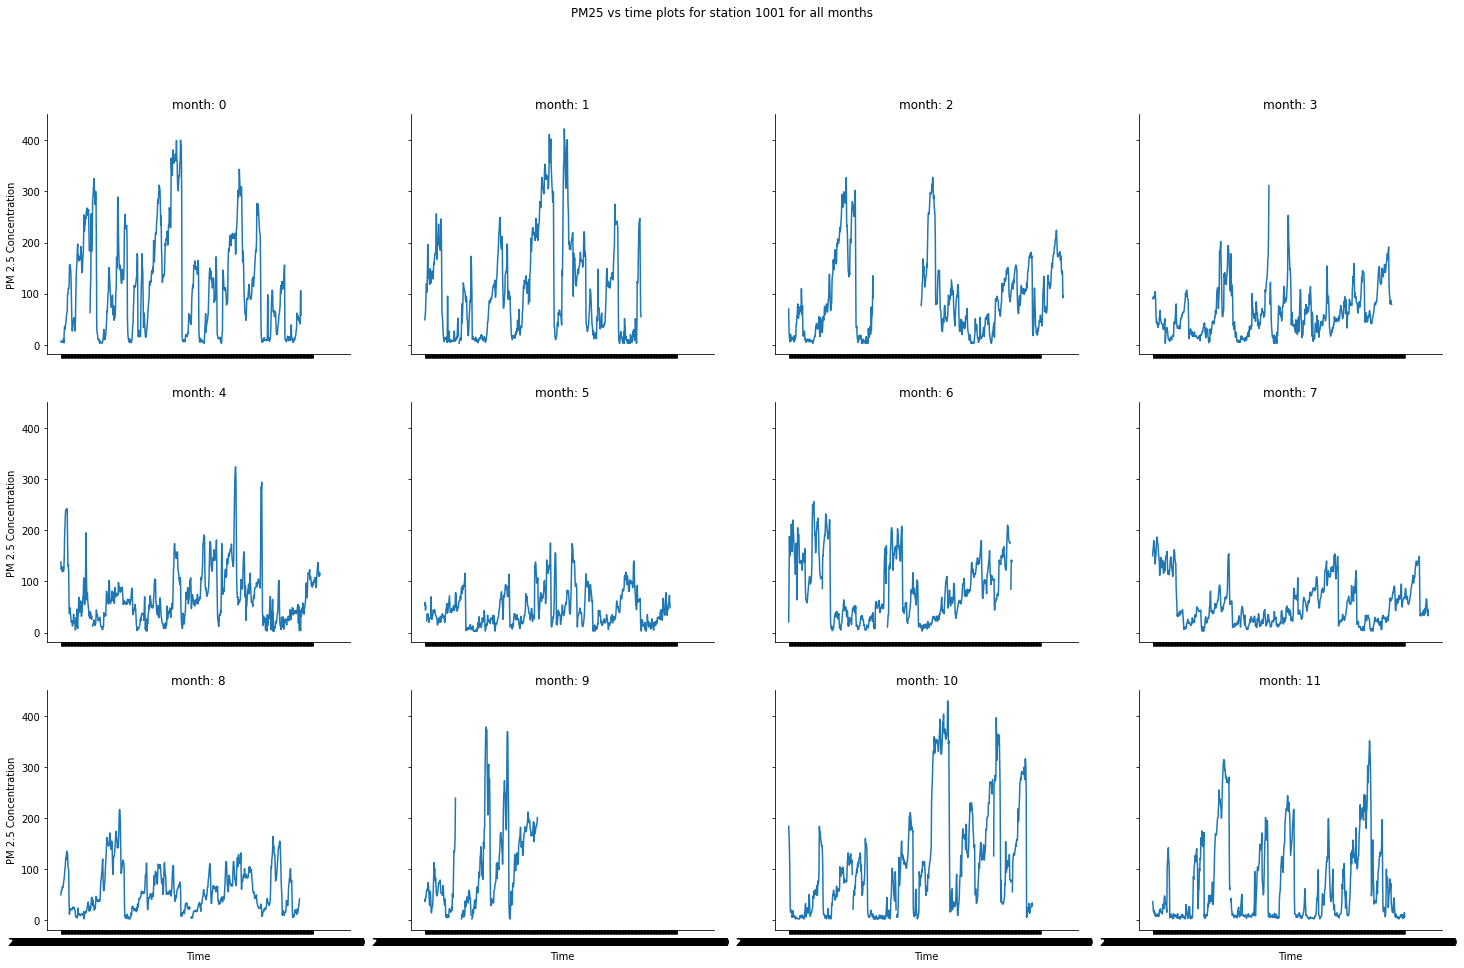

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(25,15))
fig.suptitle("PM25 vs time plots for station 1001 for all months")
for r in range(3):
    for c in range(4):
        month = r*4 + c
        time = final_months[month][final_months[month]['station_id']==1001]['time']
        pm25 = final_months[month][final_months[month]['station_id']==1001]['PM25_Concentration']
        axs[r,c].plot(time, pm25)
        # axs[r,c].xticks(ticks=time[::120])
        axs[r,c].set_title(f"month: {month}")

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='PM 2.5 Concentration')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
sns.despine()

In [ ]:
fig.savefig("Plots/station_1001_all_months_pm25.png")

In [ ]:
!pip install geopandas

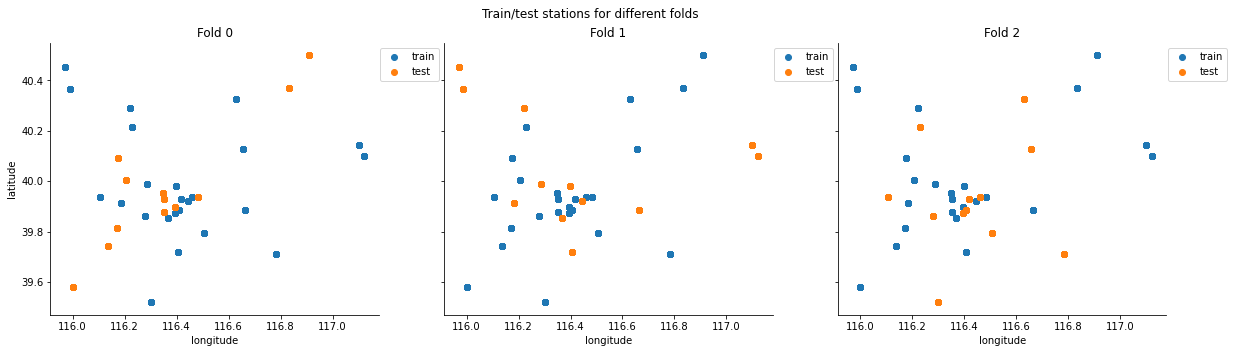

In [ ]:
fig, axs = plt.subplots(1,3,sharey=True, figsize=(20,5))
fig.suptitle("Train/test stations for different folds")
for fold in [0,1,2]:
    test = pd.read_csv(f"/content/drive/Shareddrives/Machine Learning - Transformers/Data/interpolated/fold_{fold}_test.csv")
    train = pd.read_csv(f"/content/drive/Shareddrives/Machine Learning - Transformers/Data/interpolated/fold_{fold}_train.csv")
    axs[fold].scatter(train['longitude'], train['latitude'], label='train')
    axs[fold].scatter(test['longitude'], test['latitude'], label='test')
    axs[fold].set_title(f"Fold {fold}")
    axs[fold].legend()
    axs[fold].legend(bbox_to_anchor=(1.2,1))

for ax in axs.flat:
    ax.set(xlabel='longitude', ylabel='latitude')

for ax in axs.flat:
    ax.label_outer()
sns.despine()
plt.show()

In [ ]:
fig.savefig("/content/drive/Shareddrives/Machine Learning - Transformers/Plots/stations_for_diff_folds.png")